In [ ]:
!pip install chart-studio
!pip install distvis

In [102]:
import numpy as np
import pandas as pd
from itertools import product
import matplotlib.pyplot as plt
import chart_studio
from distvis import plots as dplot
import chart_studio.plotly as py
import plotly.graph_objects as go
from plotly.subplots import make_subplots


In [111]:
import chart_studio.plotly as py


username='miloiturra'
api_key='CrY0Z3dZVv539AVcBAcW'

chart_studio.tools.set_credentials_file(username=username,
                                        api_key=api_key)

In [5]:
datos = pd.read_csv('../datos/datos_procesados.csv').iloc[:, 1:]

In [6]:
numerical_features = [
    'edad', 'meses_empleo'
]

categorical_features = [
    'sexo', 'rol_hogar', 'tipo_zona', 
    'termino_nivel', 'cine', 'est_conyugal', 'region', 'comuna', 'provincia',
    'est_subcontratado', 'categoria_empleo', 'grupo_ocupacion', 'nacionalidad',
    'rango_edad'
]

features = categorical_features + numerical_features
target = "sueldo_neto"

# Sesgos de los datos

In [7]:
def diferencia_pct(sueldo_hombres, sueldo_mujeres):
    return ((sueldo_hombres[:, None] - sueldo_mujeres[None, :])/sueldo_mujeres[None, :]).flatten()

def dif_pct_sexo(datos, samples=100):
    sueldo_hombres = np.random.choice(datos.query('sexo == "Hombre"')[target].values, samples, replace=True)
    sueldo_mujeres = np.random.choice(datos.query('sexo == "Mujer"')[target].values, samples, replace=True)
    
    return diferencia_pct(sueldo_hombres, sueldo_mujeres)

## Comparar un hombre random con una mujer random

In [8]:
sueldo_hombres = datos.query('sexo == "Hombre"')[target].values
sueldo_mujeres = datos.query('sexo == "Mujer"')[target].values

comparaciones = dif_pct_sexo(datos, samples=1000)

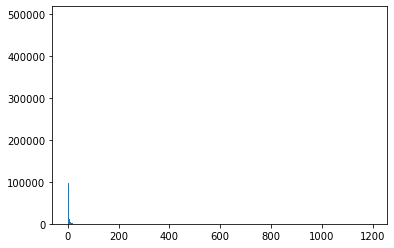

In [9]:
plt.hist(comparaciones, bins=1000);

In [10]:
comparaciones.mean()

1.399237091264058

In [11]:
np.quantile(comparaciones, 0.5)

0.23076923076923078

In [12]:
np.quantile(comparaciones, 0.45)

0.10085048806417458

In [13]:
comparaciones.mean()

1.399237091264058

In [14]:
(comparaciones < 0).mean()

0.398996

In [15]:
(comparaciones < 0).mean()

0.398996

## Por grupos demográficos

Dividimos la base de datos en grupos demograficos en base a las siguientes variables:
- cine
- categoria_empleo
- grupo_ocupacion
- rango_edad

Asumimos que las diferencias de sueldos para hombre y mujeres para personas en un mismo grupo deberían ser similares

In [16]:
hombres = datos.query('sexo == "Hombre"')[target].values
mujeres = datos.query('sexo == "Mujer"')[target].values

np.quantile(((hombres[:, None] - mujeres[None, :])/mujeres[None, :]).flatten(), 0.5)

0.210589007725735

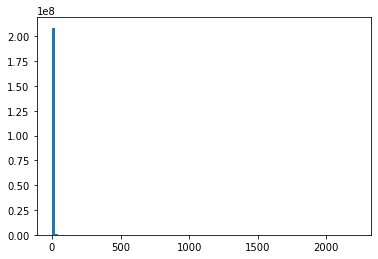

In [17]:
plt.hist(((hombres[:, None] - mujeres[None, :])/mujeres[None, :]).flatten(), bins=100);

In [19]:
grupos = ['cine', 'categoria_empleo', 'grupo_ocupacion', 'rango_edad']
datos.groupby(grupos)

In [21]:
dplot.marginal_dependency_plot??

Signature:
dplot.marginal_dependency_plot(
    data,
    target,
    feature_col,
    categorical_feature=False,
    categorical_target_class=None,
    categorical_target_alpha=0.1,
    bins=20,
    sample_pct=1,
    lower_q=0.1,
    upper_q=0.9,
    max_n_categories=100,
    categories_recall_pct=1,
    keep_nan=True,
    xaxis_title=None,
    yaxis_title=None,
    show_global_metric=True,
    **kwargs,
)
Docstring: <no docstring>
Source:   
def marginal_dependency_plot(
    data, 
    target, 
    feature_col, 
    categorical_feature=False, 
    categorical_target_class=None,
    categorical_target_alpha=0.1,
    bins=20, 
    sample_pct=1, 
    lower_q=.1,
    upper_q=.9,
    max_n_categories=100,
    categories_recall_pct=1,
    keep_nan=True,
    xaxis_title=None,
    yaxis_title=None,
    show_global_metric=True,
    **kwargs
):
    nan_target_constrain = ~data[target].isna()
    
    sample_data = (
        data[[target, feature_col]].loc[nan_target_constrain]
        .sample(f

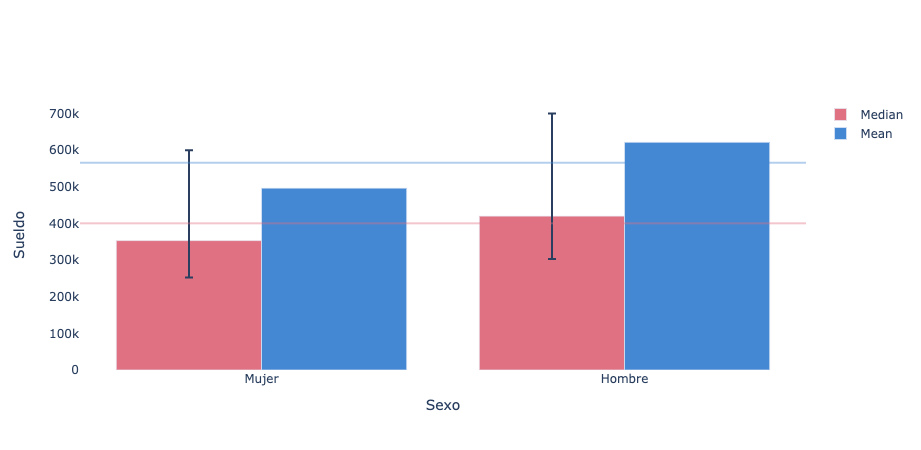

In [103]:
feature = "sexo"
name = "Sexo"
fig = dplot.marginal_dependency_plot(datos, target, feature, categorical_feature=True, lower_q=0.25, upper_q=0.75, 
                                     yaxis_title='Sueldo', xaxis_title=name)

py.plot(fig, filename=f"mean_median_sueldo_{feature}", auto_open=True)
fig.show()

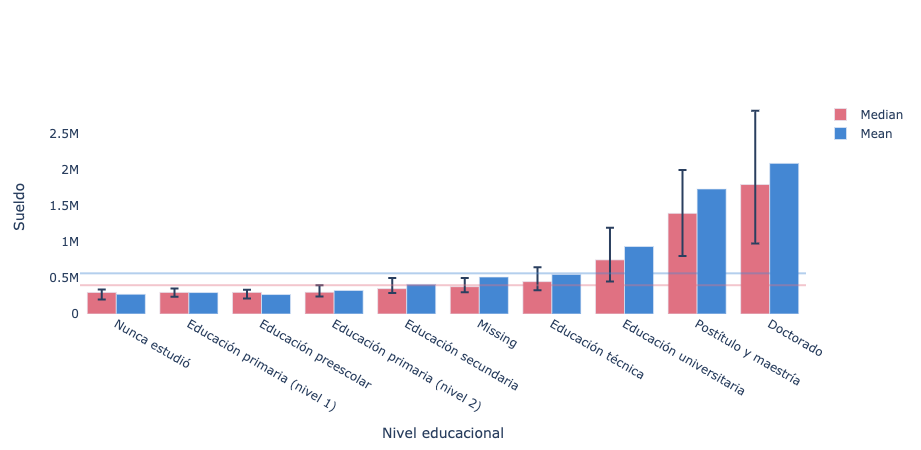

In [107]:
feature = "cine"
name = "Nivel educacional"
fig = dplot.marginal_dependency_plot(datos, target, feature, categorical_feature=True, lower_q=0.25, upper_q=0.75, 
                                     yaxis_title='Sueldo', xaxis_title=name)

py.plot(fig, filename=f"mean_median_sueldo_{feature}", auto_open=True)
fig.show()

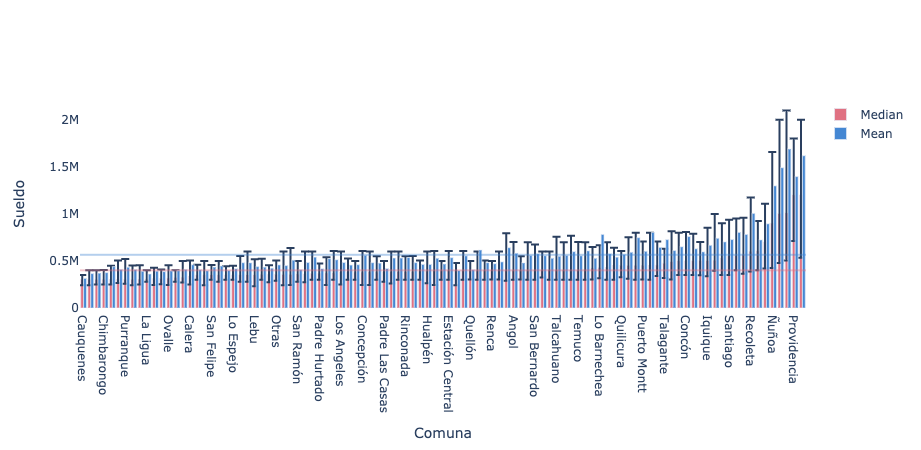

In [108]:
feature = "comuna"
name = "Comuna"
fig = dplot.marginal_dependency_plot(datos, target, feature, categorical_feature=True, lower_q=0.25, upper_q=0.75, 
                                     yaxis_title='Sueldo', xaxis_title=name)

py.plot(fig, filename=f"mean_median_sueldo_{feature}", auto_open=True)
fig.show()

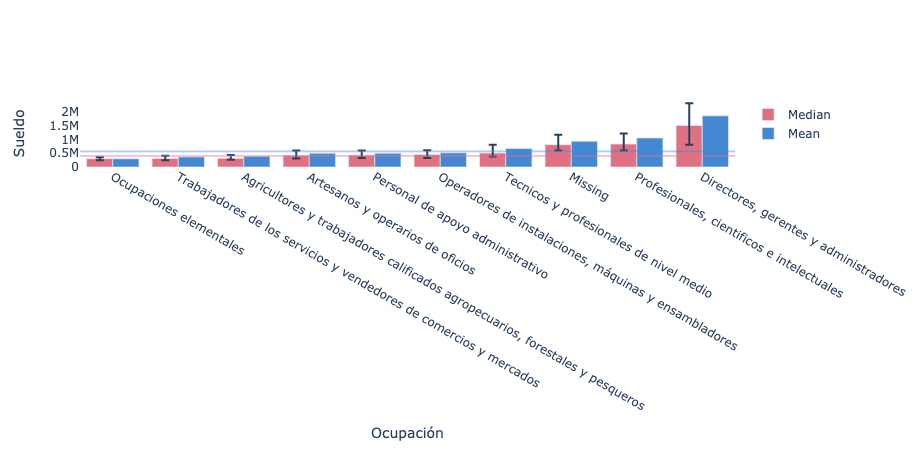

In [110]:
feature = "grupo_ocupacion"
name = "Ocupación"
fig = dplot.marginal_dependency_plot(datos, target, feature, categorical_feature=True, lower_q=0.25, upper_q=0.75, 
                                     yaxis_title='Sueldo', xaxis_title=name)

py.plot(fig, filename=f"mean_median_sueldo_{feature}", auto_open=True)
fig.show()

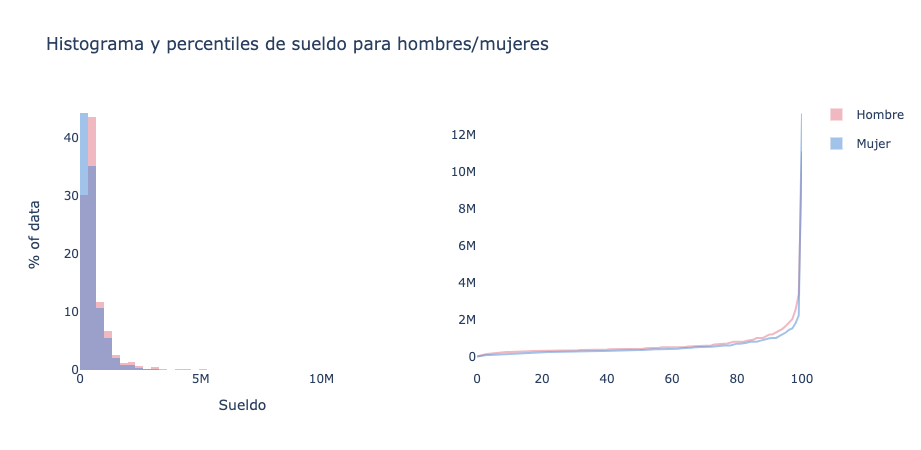

'https://plotly.com/~miloiturra/3/'

In [104]:
fig_dict, dist = dplot.compare_numerical_features(datos, [target], groupby=feature, nbins=40, plot_hist=True, plot_inv_cdf=True)
fig_dict[target].update_layout(xaxis_title='Sueldo', title='Histograma y percentiles de sueldo para hombres/mujeres')
fig_dict[target].show()

py.plot(fig_dict[target], filename=f"hist_sueldo_{feature}", auto_open=True)

In [94]:
q = np.linspace(0.01, .99, 99)
percentiles = datos.groupby('sexo')[target].quantile(q).unstack(1).T
dif_perc = ((percentiles['Hombre'] - percentiles['Mujer'])/percentiles['Mujer']).values

In [106]:
fig = make_subplots(rows=1, cols=1)
lines = go.Scatter(
    x=100*q, y=100*dif_perc, 
    name='value', 
    opacity=0.5, 
    legendgroup='asdf', 
    showlegend=False,
    marker_color="#E07182",
    mode='lines',
    hovertemplate="%{y:,.2f}",
)
fig.add_trace(lines, row=1, col=1)

fig.update_layout(
    yaxis=dict(title='Diferencia % hombre/mujer [%]', showgrid=False),
    xaxis=dict(title='Percentil [%]', showgrid=False),
    height=None, width=None,
    title='Diferencia % de sueldos Hombre/Mujer',
    hovermode="x",
    paper_bgcolor='white',
    plot_bgcolor='white',
    hoverlabel_align='right',
    barmode='overlay',  
)

py.plot(fig, filename=f"dif_perc_{feature}", auto_open=True)

'https://plotly.com/~miloiturra/6/'

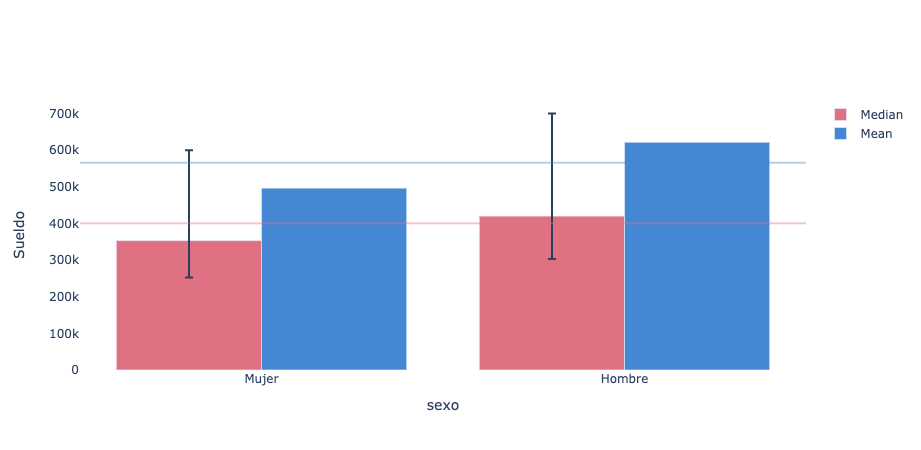

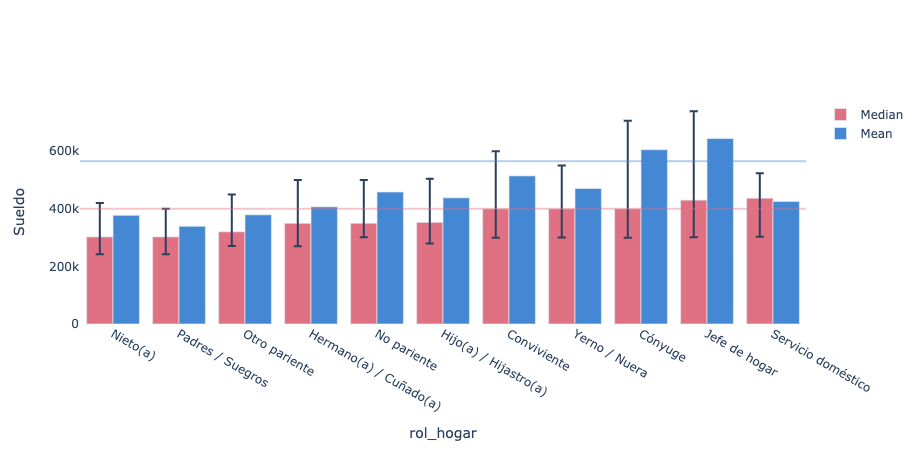

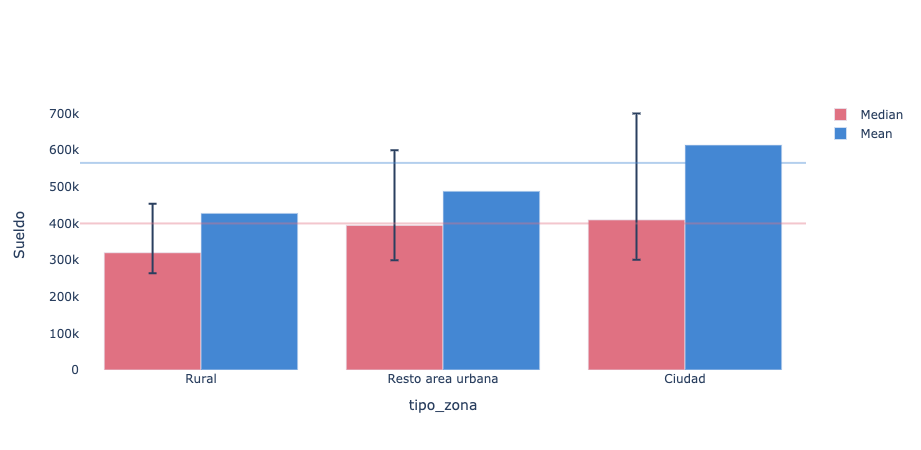

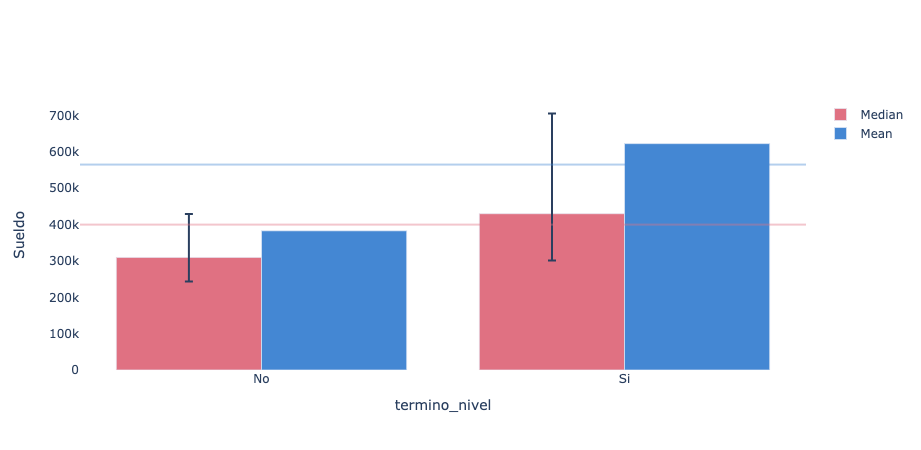

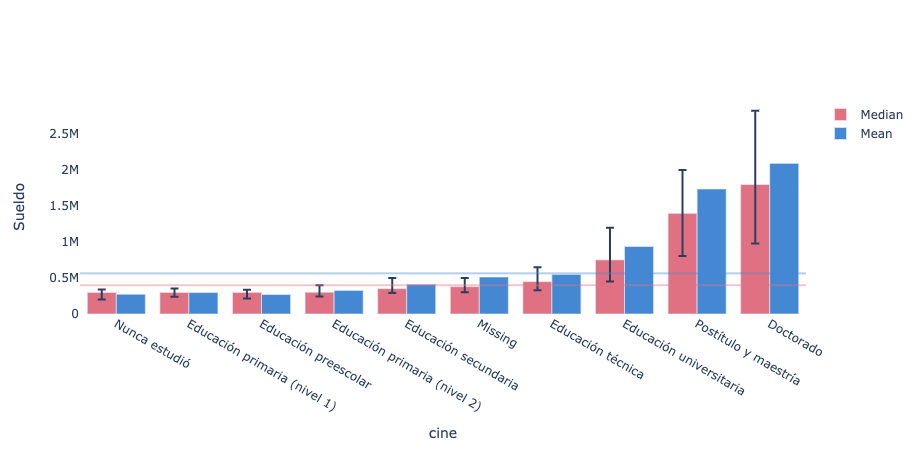

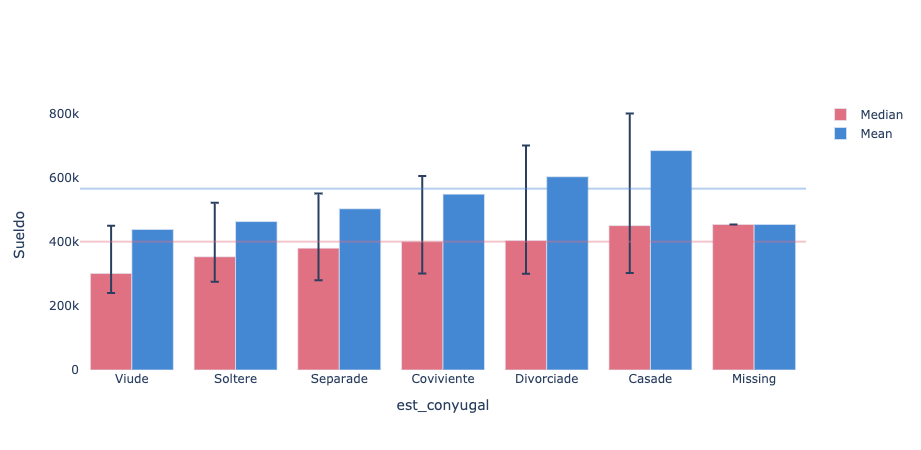

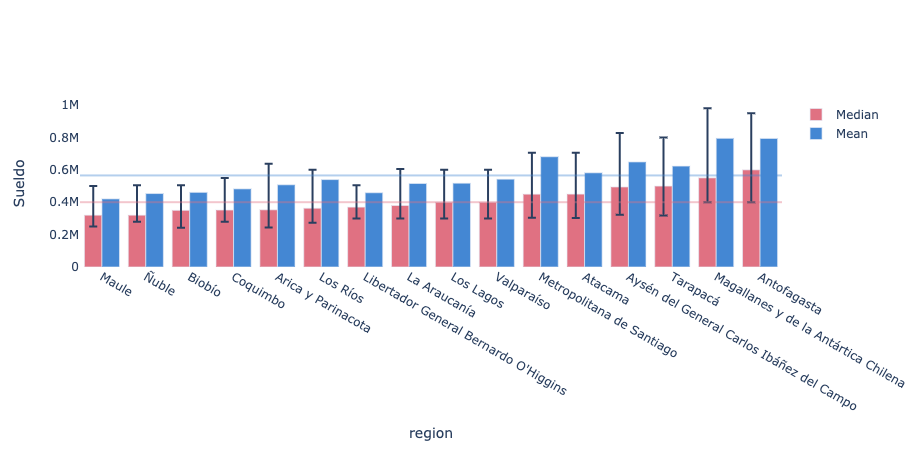

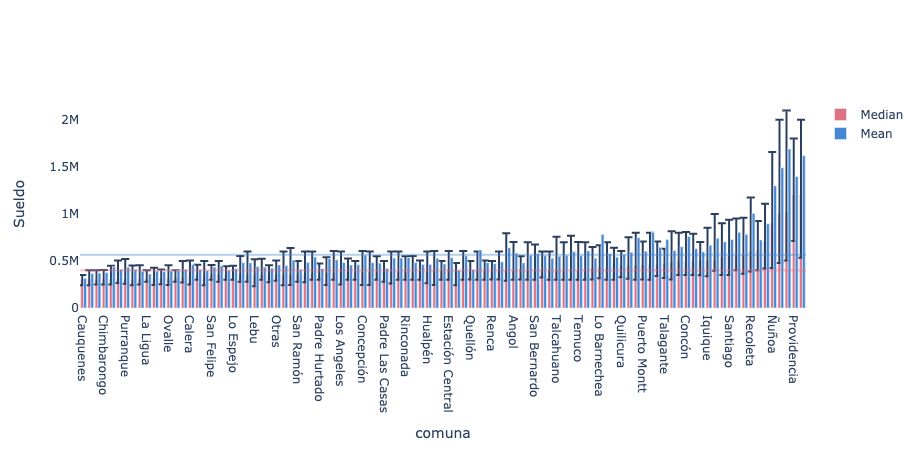

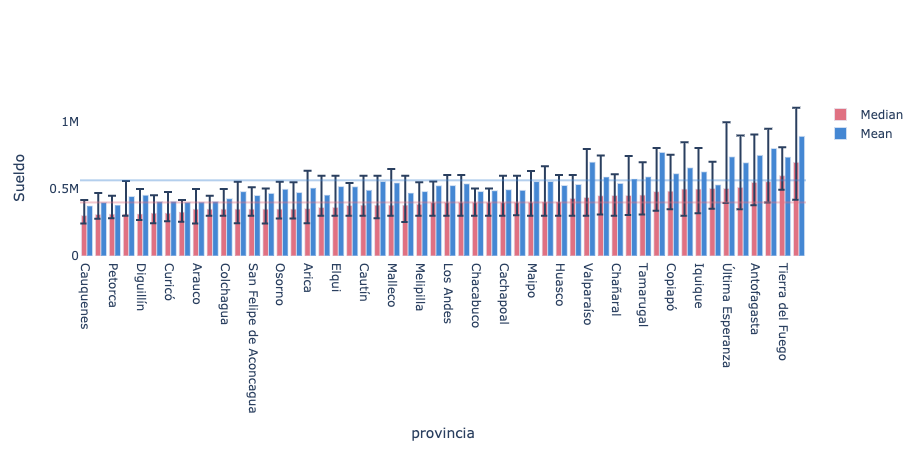

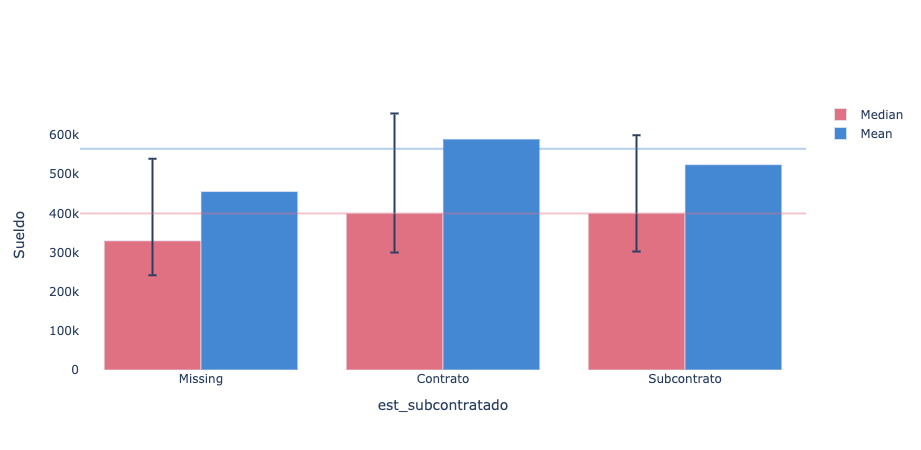

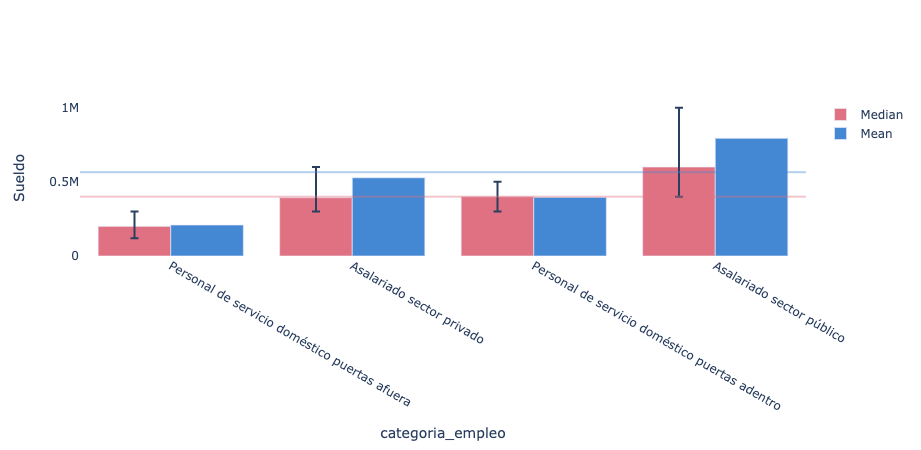

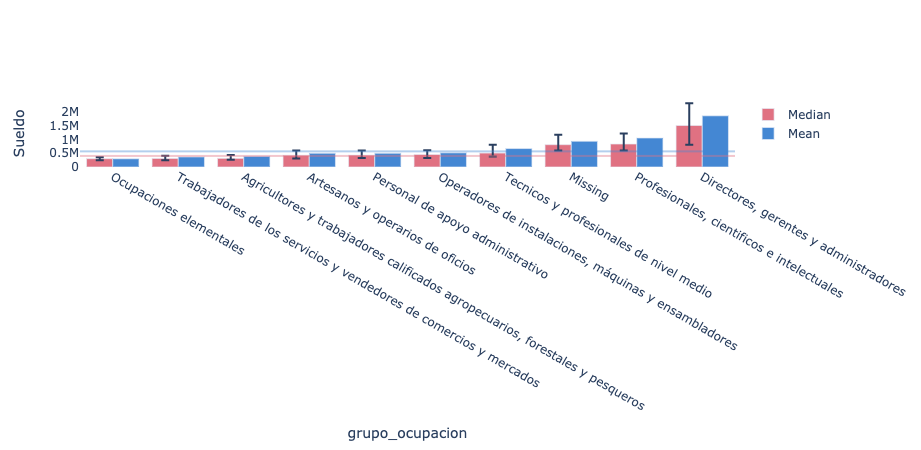

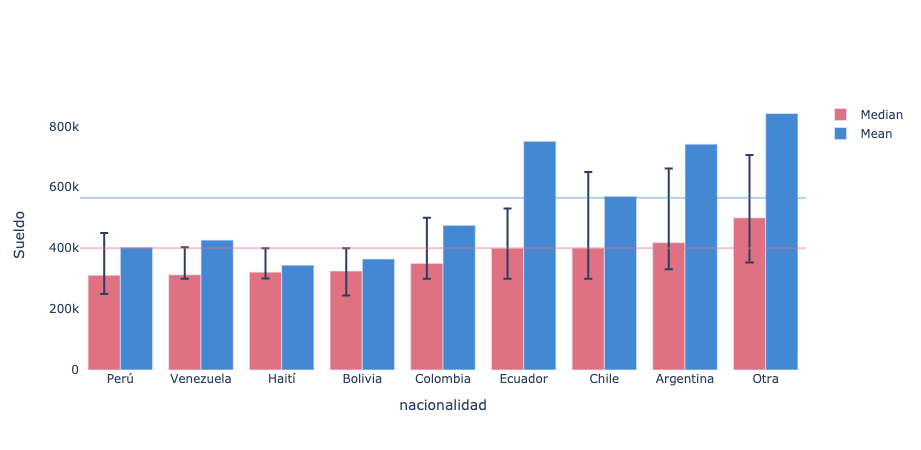

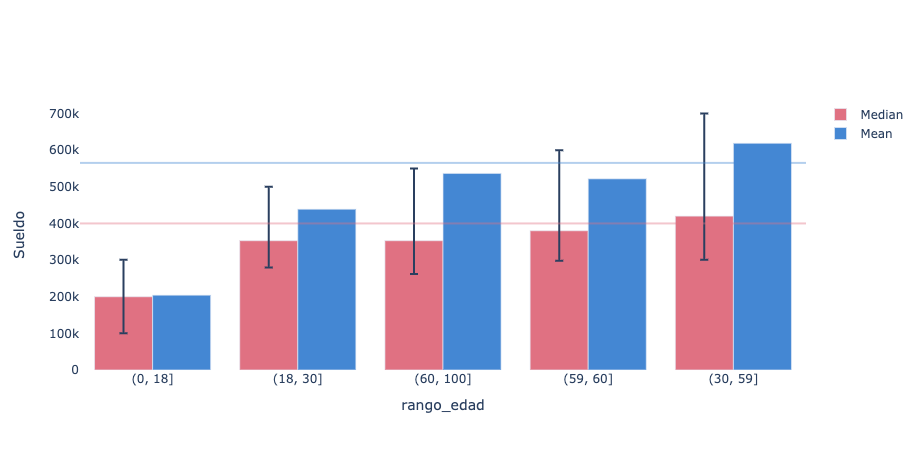

In [23]:
for f in categorical_features:
    fig = dplot.marginal_dependency_plot(datos, target, f, categorical_feature=True, lower_q=0.25, upper_q=0.75, yaxis_title='Sueldo')
    fig.show()

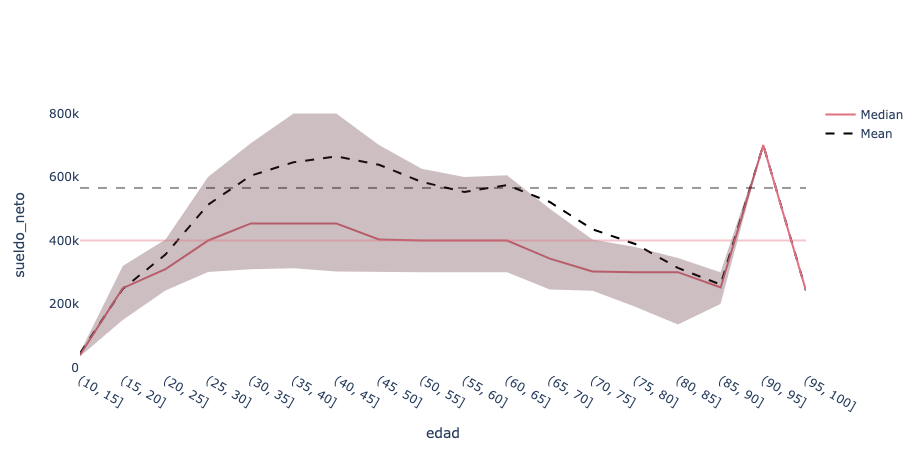

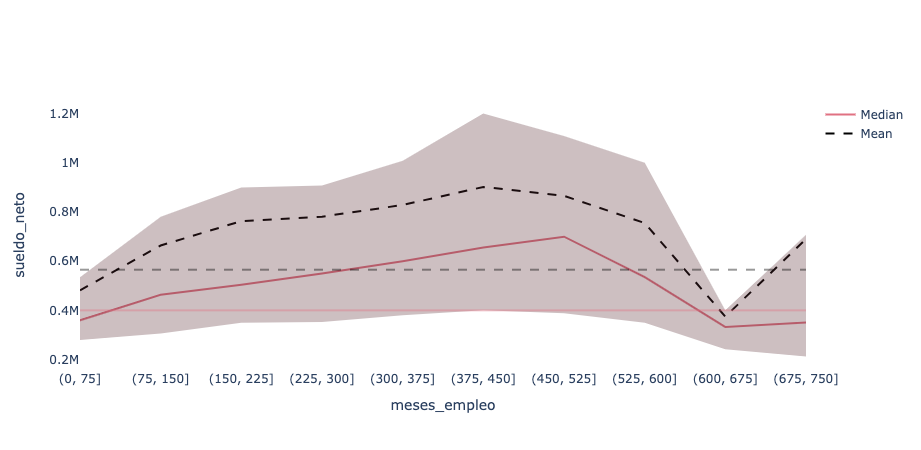

In [7]:
bins_dict = {
    'edad': np.linspace(10, 100, 19).astype(int),
    'meses_empleo': np.linspace(0, 750, 11).astype(int)
}
for f in numerical_features:
    fig = dplot.marginal_dependency_plot(datos, target, f, bins=bins_dict[f], lower_q=0.25, upper_q=0.75)
    fig.show()

In [ ]:
fig = dplot.compare_numerical_features(datos, target, f, categorical_feature=True, lower_q=0.25, upper_q=0.75)
